In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Reading file nfl_games
Path = r'C:\Users\Dhwani\DataScienceHW4\data\raw\nfl_games.csv'
nflDf = pd.read_csv(Path)
nflDf.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


In [3]:
nflDf= nflDf.drop(columns=['date','season','team1','team2','neutral','playoff','result1'])

In [4]:
nflDf.shape

(16007, 5)

In [5]:
nflDf.head()

,elo1,elo2,elo_prob1,score1,score2
0,1503.947,1300.000,0.824651,48,0
1,1503.420,1300.000,0.824212,43,0
2,1503.420,1300.000,0.824212,10,0
3,1493.002,1504.908,0.575819,14,0
4,1516.108,1478.004,0.644171,45,0


In [7]:
nflDf.isna().sum()

elo1         0
elo2         0
elo_prob1    0
score1       0
score2       0
dtype: int64

In [8]:
# Sperate train and test data
from sklearn.model_selection import train_test_split
X = nflDf.drop(columns=['score1','score2'])
y1 = nflDf.score1
y2 = nflDf.score2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
# 1. Set up the model for score1 score2
modelScore1 = LinearRegression()
modelScore2 = LinearRegression()
# 2. Use fit
modelScore1.fit(X1_train, y1_train)
modelScore2.fit(X1_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Coefficients of score1: \n', modelScore1.coef_)
print('Coefficients of score2: \n', modelScore2.coef_)

Coefficients of score1: 
 [ 0.03673268 -0.03163221 -8.96149853]
Coefficients of score2: 
 [-5.59568150e-03  9.48786401e-03 -1.21755995e+01]


In [11]:
print('Intercept of team1 : \n',modelScore1.intercept_)
print('Intercept of team2 : \n',modelScore2.intercept_)

Intercept of team1 : 
 19.02033816737393
Intercept of team2 : 
 19.829353029442977


In [12]:
predictedScoreTrain=modelScore1.predict(X1_train)
predictedScoreTest=modelScore1.predict(X1_test)

In [13]:
# Mean squared error for Score 1
errorScore1 = np.mean(np.subtract(y1_train.values,predictedScoreTrain) ** 2)
print (errorScore1)
errorScore1 = np.mean(np.subtract(y1_test.values,predictedScoreTest) ** 2)
print (errorScore1)

#Mean squared error for score 2 
errorScore2 = np.mean(np.subtract(y2_train.values,modelScore2.predict(X2_train)) ** 2)
print (errorScore2)
errorScore2 = np.mean(np.subtract(y2_test.values,modelScore2.predict(X2_test)) ** 2)
print (errorScore2)

116.45086064789184
117.53545039843401
105.72219488527077
107.4870021013677


Text(0.5,1,'Residual Plot(Score 1) - Train:Blue and Test:Green')

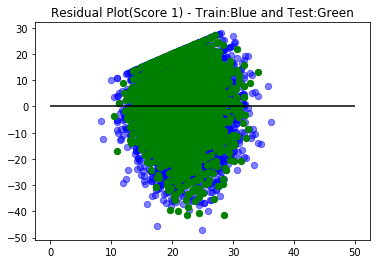

In [14]:
# Residual Plot for score 1

plt.scatter(predictedScoreTrain,np.subtract(predictedScoreTrain,y1_train.values),c='b',s=40,alpha=0.5)
plt.scatter(predictedScoreTest,np.subtract(predictedScoreTest,y1_test.values),c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)

plt.title('Residual Plot(Score 1) - Train:Blue and Test:Green')

In [15]:
# I am not satisfied with the error so trying on different dataset
FilePath = r'C:\Users\Dhwani\DataScienceHW4\data\raw\mlb_elo.csv'
mlbDf = pd.read_csv(FilePath)
mlbDf.head(10)

C:\Users\Dhwani\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2018-10-21,2018,0,l,BOS,HOU,1581.755890,1604.114732,0.503149,0.496851,...,NaN,NaN,NaN,NaN,0.509994,0.490006,NaN,NaN,NaN,NaN
1,2018-10-20,2018,0,l,MIL,LAD,1556.560437,1578.732466,0.503507,0.496493,...,NaN,NaN,NaN,NaN,0.477322,0.522678,NaN,NaN,NaN,NaN
2,2018-10-20,2018,0,l,BOS,HOU,1581.755890,1604.114732,0.503149,0.496851,...,NaN,NaN,NaN,NaN,0.509994,0.490006,NaN,NaN,NaN,NaN
3,2018-10-19,2018,0,l,MIL,LAD,1556.560437,1578.732466,0.503507,0.496493,...,NaN,NaN,NaN,NaN,0.479401,0.520599,NaN,NaN,NaN,NaN
4,2018-10-18,2018,0,l,HOU,BOS,1604.114732,1581.755890,0.588028,0.411972,...,NaN,NaN,NaN,NaN,0.569861,0.430139,NaN,NaN,NaN,NaN
5,2018-10-17,2018,0,l,HOU,BOS,1604.114732,1581.755890,0.588028,0.411972,...,NaN,NaN,NaN,NaN,0.575300,0.424700,NaN,NaN,NaN,NaN
6,2018-10-17,2018,0,l,LAD,MIL,1578.732466,1556.560437,0.587680,0.412320,...,NaN,NaN,NaN,NaN,0.627664,0.372336,NaN,NaN,NaN,NaN
7,2018-10-16,2018,0,l,LAD,MIL,1578.732466,1556.560437,0.587680,0.412320,...,54.297595,NaN,3.481554,NaN,0.611002,0.388998,NaN,NaN,NaN,NaN
8,2018-10-16,2018,0,l,HOU,BOS,1604.114732,1581.755890,0.588028,0.411972,...,NaN,NaN,NaN,NaN,0.575300,0.424700,NaN,NaN,NaN,NaN
9,2018-10-15,2018,0,l,LAD,MIL,1578.732466,1556.560437,0.587680,0.412320,...,58.029449,54.051139,21.021268,10.943109,0.608447,0.391553,NaN,NaN,NaN,NaN


In [16]:
#Feature Engineering dropping columns which are not required for regression

mlbDf = mlbDf.drop(columns=['date','season','team1','team2','neutral','playoff','pitcher1','pitcher2'])

In [17]:
#Checking for null values

mlbDf.isna().sum()

elo1_pre            0
elo2_pre            0
elo_prob1           0
elo_prob2           0
elo1_post          11
elo2_post          11
rating1_pre         0
rating2_pre         0
pitcher1_rgs    33749
pitcher2_rgs    33750
pitcher1_adj    34430
pitcher2_adj    34430
rating_prob1        0
rating_prob2        0
rating1_post       11
rating2_post       11
score1             11
score2             11
dtype: int64

In [18]:
#Replacing null values with mean

mlbDf.fillna(mlbDf.mean(),inplace=True)
mlbDf.isna().sum()

elo1_pre        0
elo2_pre        0
elo_prob1       0
elo_prob2       0
elo1_post       0
elo2_post       0
rating1_pre     0
rating2_pre     0
pitcher1_rgs    0
pitcher2_rgs    0
pitcher1_adj    0
pitcher2_adj    0
rating_prob1    0
rating_prob2    0
rating1_post    0
rating2_post    0
score1          0
score2          0
dtype: int64

In [19]:
mlbDf.head()

,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,1581.755890,1604.114732,0.503149,0.496851,1503.763443,1503.405033,1584.723106,1613.970612,50.336562,50.313851,6.625906,6.656227,0.509994,0.490006,1503.759261,1503.413972,4.649708,4.403278
1,1556.560437,1578.732466,0.503507,0.496493,1503.763443,1503.405033,1559.933439,1583.284744,50.336562,50.313851,6.625906,6.656227,0.477322,0.522678,1503.759261,1503.413972,4.649708,4.403278
2,1581.755890,1604.114732,0.503149,0.496851,1503.763443,1503.405033,1584.723106,1613.970612,50.336562,50.313851,6.625906,6.656227,0.509994,0.490006,1503.759261,1503.413972,4.649708,4.403278
3,1556.560437,1578.732466,0.503507,0.496493,1503.763443,1503.405033,1559.933439,1583.284744,50.336562,50.313851,6.625906,6.656227,0.479401,0.520599,1503.759261,1503.413972,4.649708,4.403278
4,1604.114732,1581.755890,0.588028,0.411972,1503.763443,1503.405033,1613.970612,1584.723106,50.336562,50.313851,6.625906,6.656227,0.569861,0.430139,1503.759261,1503.413972,4.649708,4.403278


In [20]:
# Sperating train and test data
from sklearn.model_selection import train_test_split
X = mlbDf.drop(columns=['score1','score2'])
y1 = mlbDf.score1
y2 = mlbDf.score2
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression
# 1. Set up the model
modelScore1 = LinearRegression()
modelScore2 = LinearRegression()
# 2. Use fit
modelScore1.fit(X1_train, y1_train)
modelScore2.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
# Mean squared error for score1
predictedScoreTrain1=modelScore1.predict(X1_train)
predictedScoreTest1=modelScore1.predict(X1_test)
errorScore1 = np.mean(np.subtract(y1_train.values,predictedScoreTrain1) ** 2)
print (errorScore1)
errorScore1 = np.mean(np.subtract(y1_test.values,predictedScoreTest1) ** 2)
print (errorScore1)

# Mean squared error for score 2
predictedScoreTrain2=modelScore2.predict(X2_train)
predictedScoreTest2=modelScore2.predict(X2_test)
errorScore2 = np.mean(np.subtract(y2_train.values,predictedScoreTrain2) ** 2)
print (errorScore2)
errorScore2 = np.mean(np.subtract(y2_test.values,predictedScoreTest2) ** 2)
print (errorScore2)

6.655758165463634
6.652774178086955
5.962968136405042
5.998669362286546


Text(0.5,1,'Residual Plot(Score 1) - Train:Blue and Test:Green')

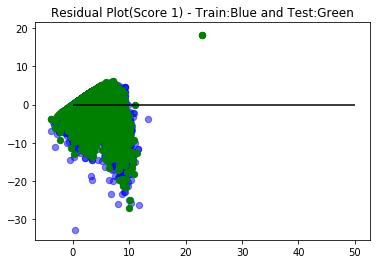

In [23]:
# Residual Plot for score 1

plt.scatter(predictedScoreTrain1,np.subtract(predictedScoreTrain1,y1_train.values),c='b',s=40,alpha=0.5)
plt.scatter(predictedScoreTest1,np.subtract(predictedScoreTest1,y1_test.values),c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)

plt.title('Residual Plot(Score 1) - Train:Blue and Test:Green')

Text(0.5,1,'Residual Plot(Score 2) - Train:Blue and Test:Green')

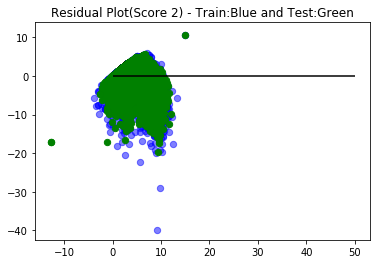

In [24]:
#Residual plot for score 2

plt.scatter(predictedScoreTrain2,np.subtract(predictedScoreTrain2,y2_train.values),c='b',s=40,alpha=0.5)
plt.scatter(predictedScoreTest2,np.subtract(predictedScoreTest2,y2_test.values),c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)

plt.title('Residual Plot(Score 2) - Train:Blue and Test:Green')